<a href="https://colab.research.google.com/github/im-srd/Customer-Behavioral-Analysis/blob/main/Customer_Behaviour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement :**
Customer Behavior Analysis is a detailed analysis of a company ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers.

# **SCENARIO** 1

# **Task 1**

**Importing Relevant Packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Extract the dataset from the file named "**dataset.csv**" and save it in customer variable

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Customer Behaviour Analysis/dataset.csv')
print('Upload Successfully.')

Upload Successfully.


In [ ]:
# Is the dataset successfully called? Can you check with the top 10 records?
customer.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
# Check for the structure and dimensions of the dataset
data_structure = customer.shape
print('Rows : ',data_structure[0])
print('Columns : ',data_structure[1])

Rows :  2240
Columns :  29


In [ ]:
# Show the column names
customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# **Task 2**

In [ ]:
# Create a new column "Age" by subtracting the column Year_Birth from 2015
# present_year = int(input('Enter the present year : '))
present_year = 2015
age_values = present_year - customer['Year_Birth']
customer['age'] = age_values
customer['age']

0       58
1       61
2       50
3       31
4       34
        ..
2235    48
2236    69
2237    34
2238    59
2239    61
Name: age, Length: 2240, dtype: int64

In [ ]:
# Check the statistics of the dataset
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
# Work on analysing Missing values and show the output
null_values = customer.isnull().sum()
null_values[null_values>0]

Income    24
dtype: int64

Only 'Income' has null values. So we can fill it using the mean or median.
No need to drop the column as only 24 out of 2240 are missing.

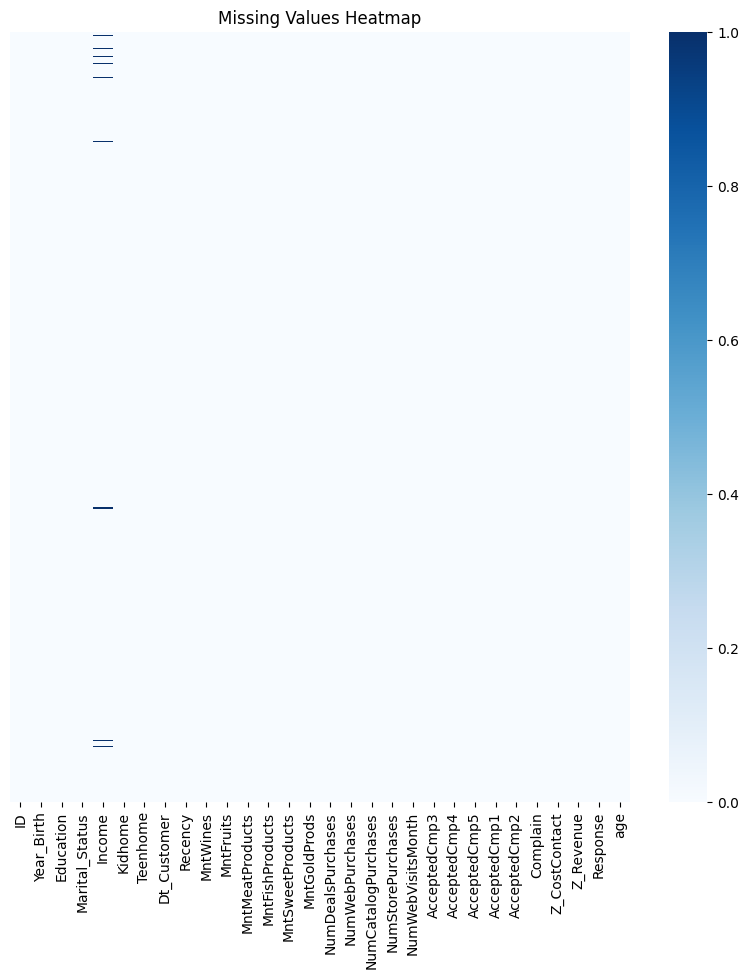

In [ ]:
# Showing missing values using HEATMAP

# Create a Boolean mask where missing values are True
missing_values = customer.isnull()

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 10))  # You can adjust the figure size as needed
sns.heatmap(missing_values, cbar=True, cmap='Blues', yticklabels=False)  # 'cbar' removes the color bar

# Optionally, you can set the plot title
plt.title('Missing Values Heatmap')

# Display the heatmap
plt.show()

# **SCENARIO 2**

In [ ]:
# Creating a column --> Month_Customer

# Convert the 'Dt_Customer' column to datetime
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])

# Extract year and month
customer['Enrollment_Year'] = customer['Dt_Customer'].dt.year
customer['Enrollment_Month'] = customer['Dt_Customer'].dt.month

# Calculate the number of months between enrollment year and 2015
customer['Month_Customer'] = (2015 - customer['Enrollment_Year']) * 12

# Subtract one month from the enrollment date's month
customer['Month_Customer'] -= (customer['Enrollment_Month'] - 1)

print('Month_Customer column Created .')

Month_Customer column Created .


<ipython-input-150-89f787c671cc>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])


In [ ]:
# Creating a column --> TotalSpendings (sum of amount spent on products)

customer['TotalSpendings'] = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

print("The 'TotalSpendings' column now contains the sum of spending on products.")


The 'TotalSpendings' column now contains the sum of spending on products.


In [ ]:
# Creating a column --> AgeGroup

# Define the age group bins and labels
age_bins = [0, 19, 39, 59, float('inf')]
age_labels = ['Teen', 'Adults', 'Middle Age Adults', 'Senior']

customer['AgeGroup'] = pd.cut(2023 - customer['Year_Birth'], bins=age_bins, labels=age_labels)

print("The 'AgeGroup' column now contains the age groups.")


The 'AgeGroup' column now contains the age groups.


In [ ]:
# Kidhome + Teenhome --> Children
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

# Droping the 'Kidhome' and 'Teenhome' columns if we no longer need them
customer = customer.drop(['Kidhome', 'Teenhome'], axis=1)

print('Kidhome and Teenhome dropped. \nChildren added.')

Kidhome and Teenhome dropped. 
Children added.


In [ ]:
# Map the values to 'Married' if they indicate being married, and 'Single' otherwise

marital_mapping = {
    'Together': 'Married',
    'Married': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

customer['Marital_Status'] = customer['Marital_Status'].map(marital_mapping)

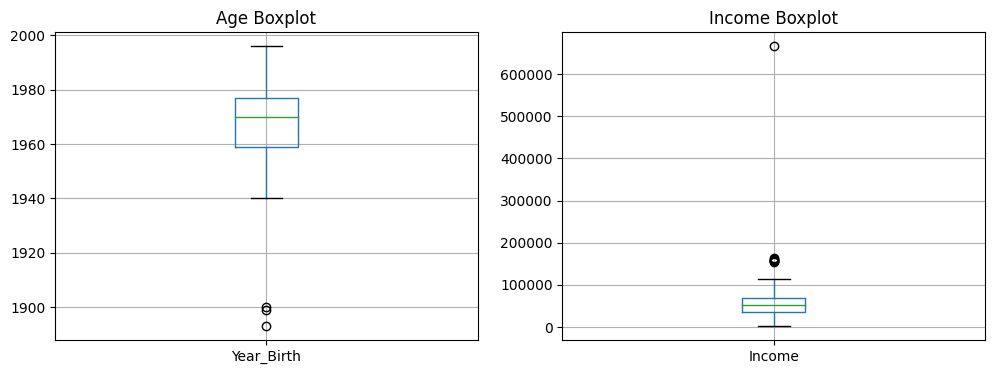

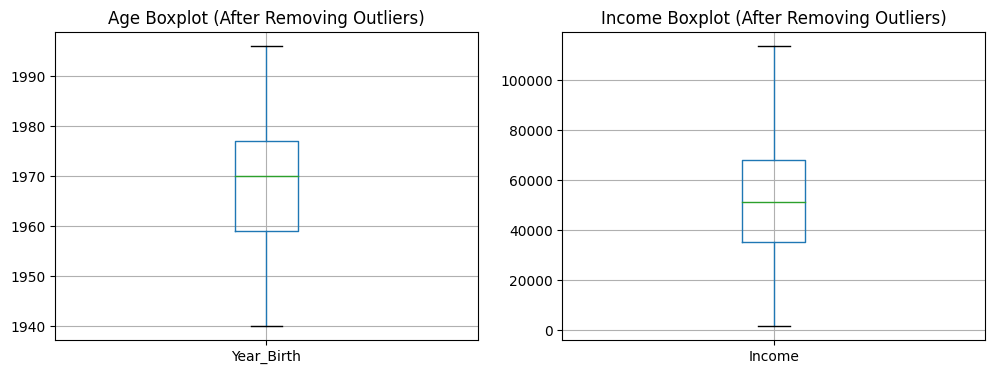

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create boxplots to visualize outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
customer.boxplot(column='Year_Birth')
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
customer.boxplot(column='Income')
plt.title('Income Boxplot')
plt.show()

# Define a function to remove outliers based on IQR (Interquartile Range)
def remove_outliers(data, column):
    Q1 = customer[column].quantile(0.25)
    Q3 = customer[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return customer[(customer[column] >= lower_bound) & (customer[column] <= upper_bound)]

# Remove outliers in 'Age' and 'Income'
customer = remove_outliers(customer, 'Year_Birth')
customer = remove_outliers(customer, 'Income')

# Create boxplots again to verify that outliers have been removed
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
customer.boxplot(column='Year_Birth')
plt.title('Age Boxplot (After Removing Outliers)')

plt.subplot(1, 2, 2)
customer.boxplot(column='Income')
plt.title('Income Boxplot (After Removing Outliers)')
plt.show()


In [ ]:
# Earlier structure of data set
data_structure

(2240, 29)

In [ ]:
# Data Structure After Pre-Processing
customer.shape

(2205, 34)

# **EDA** - *Exploratory Data Analysis*
* Univariate Analysis of each variable
* Bivariate Analysis of categorical vs numerical variables (Take target variable as fixed variable here)
* Multivariate Analysis of categorical and numerical variables
* Check distribution of variables

**UNIVARIATE ANALYSIS**

*For Numerical Features*

Summary statistics for Year_Birth:
count    2205.000000
mean     1968.904308
std        11.705801
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


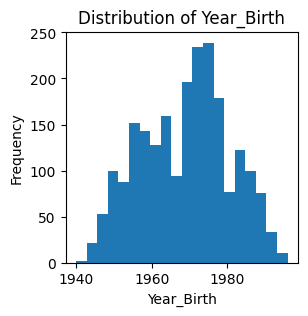

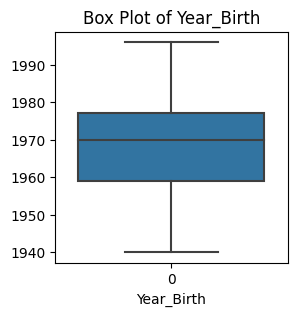

Summary statistics for Income:
count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64


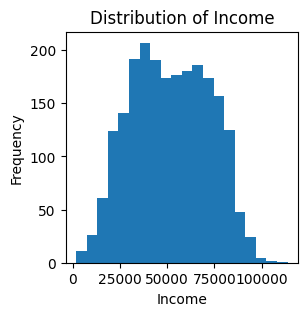

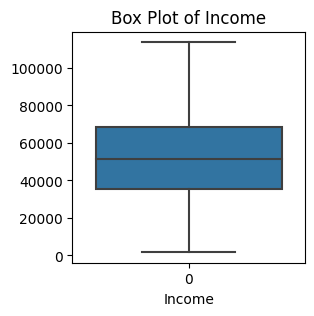

Summary statistics for Recency:
count    2205.000000
mean       49.009070
std        28.932111
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


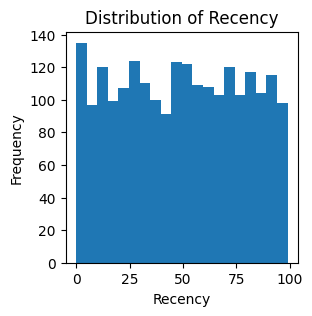

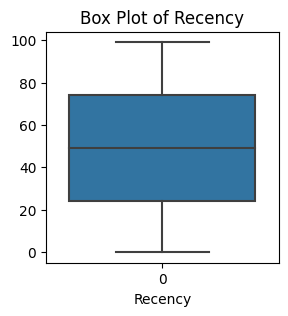

Summary statistics for MntWines:
count    2205.000000
mean      306.164626
std       337.493839
min         0.000000
25%        24.000000
50%       178.000000
75%       507.000000
max      1493.000000
Name: MntWines, dtype: float64


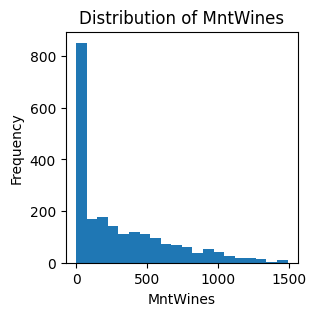

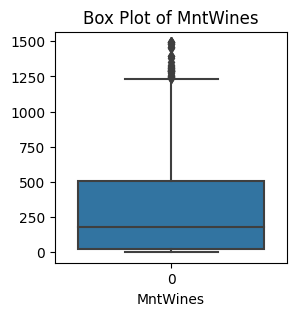

Summary statistics for MntFruits:
count    2205.000000
mean       26.403175
std        39.784484
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


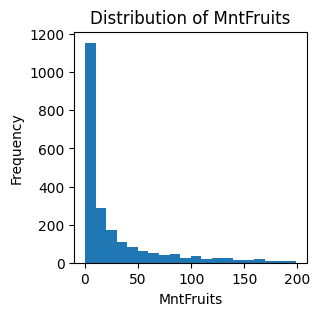

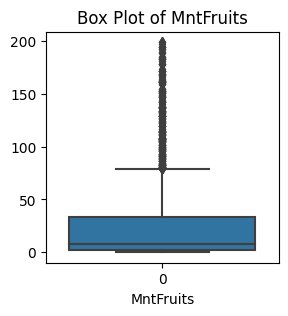

Summary statistics for MntMeatProducts:
count    2205.000000
mean      165.312018
std       217.784507
min         0.000000
25%        16.000000
50%        68.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64


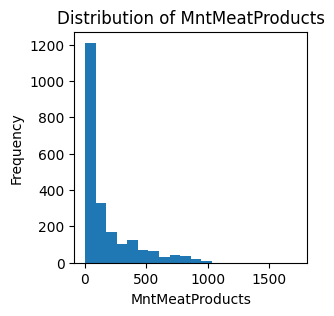

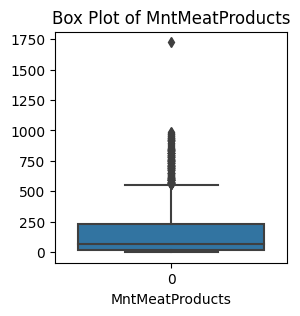

Summary statistics for MntFishProducts:
count    2205.000000
mean       37.756463
std        54.824635
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64


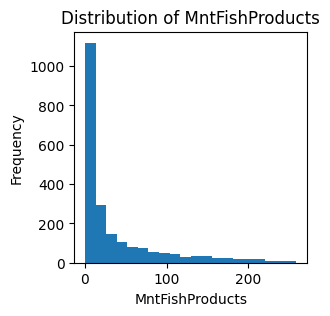

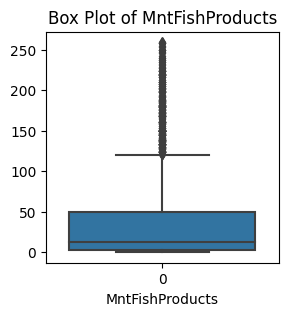

Summary statistics for MntSweetProducts:
count    2205.000000
mean       27.128345
std        41.130468
min         0.000000
25%         1.000000
50%         8.000000
75%        34.000000
max       262.000000
Name: MntSweetProducts, dtype: float64


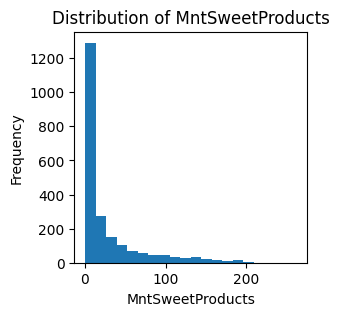

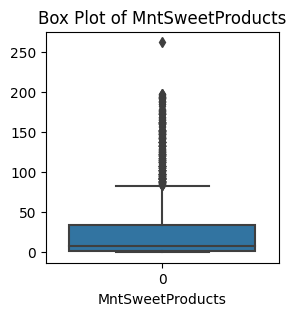

Summary statistics for MntGoldProds:
count    2205.000000
mean       44.057143
std        51.736211
min         0.000000
25%         9.000000
50%        25.000000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64


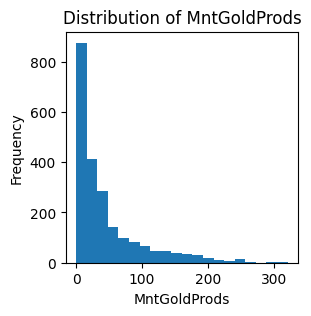

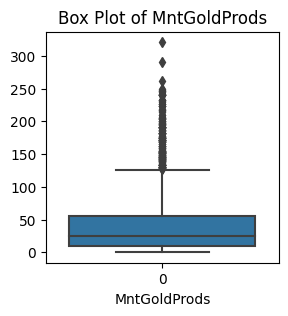

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for column in numerical_columns:
    # Summary statistics
    print(f'Summary statistics for {column}:')
    print(customer[column].describe())

    # Histogram
    plt.figure(figsize=(3, 3))
    plt.hist(customer[column], bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(3, 3))
    sns.boxplot(customer[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

*Categorical Features*

Frequency counts for Education:
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64


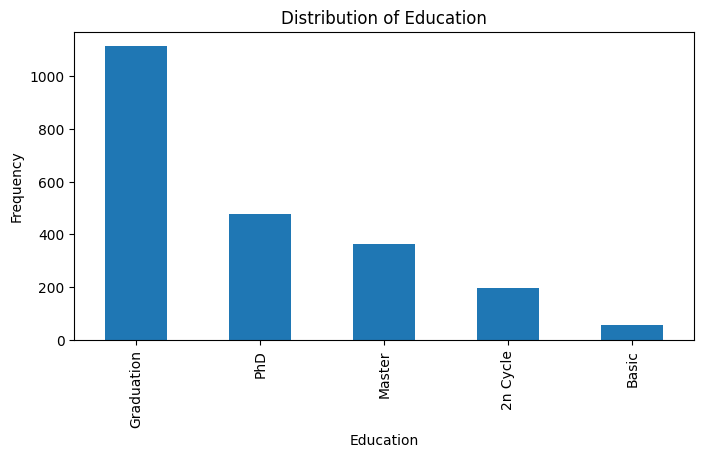

Frequency counts for Marital_Status:
Married    1422
Single      313
Name: Marital_Status, dtype: int64


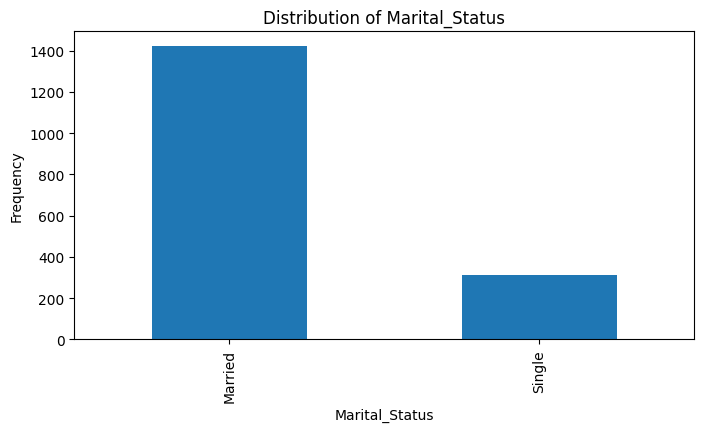

In [ ]:
categorical_columns = ['Education', 'Marital_Status']
for column in categorical_columns:
    # Frequency counts
    print(f'Frequency counts for {column}:')
    print(customer[column].value_counts())

    # Bar plot
    plt.figure(figsize=(8, 4))
    customer[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**BIVARIATE ANALYSIS**

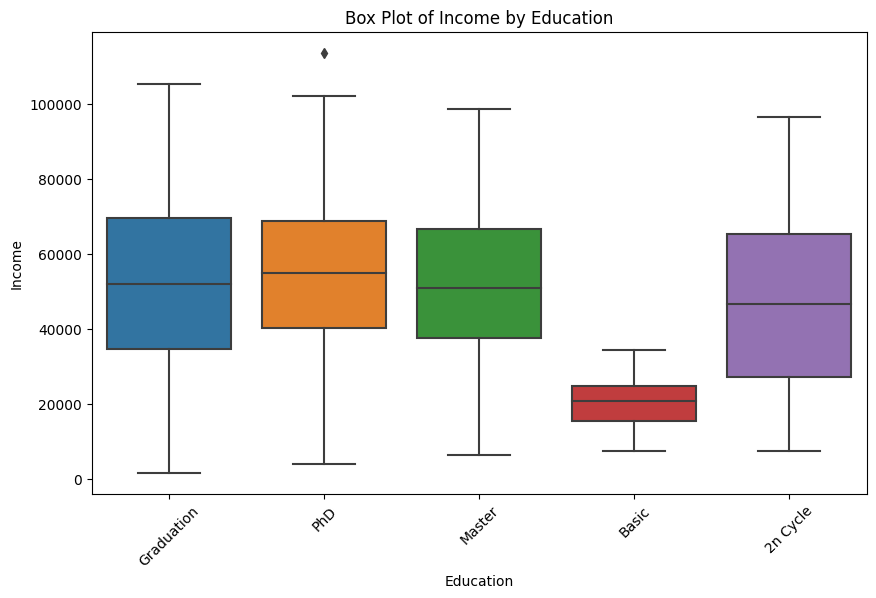

In [ ]:
# Categorical vs. Numerical Variables
# 'Education' is the categorical variable and 'Income' is the numerical variable:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=customer)
plt.title('Box Plot of Income by Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

**MULTIVARIATE ANALYSIS**

<ipython-input-161-cdd115f4fefb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer.corr().abs()


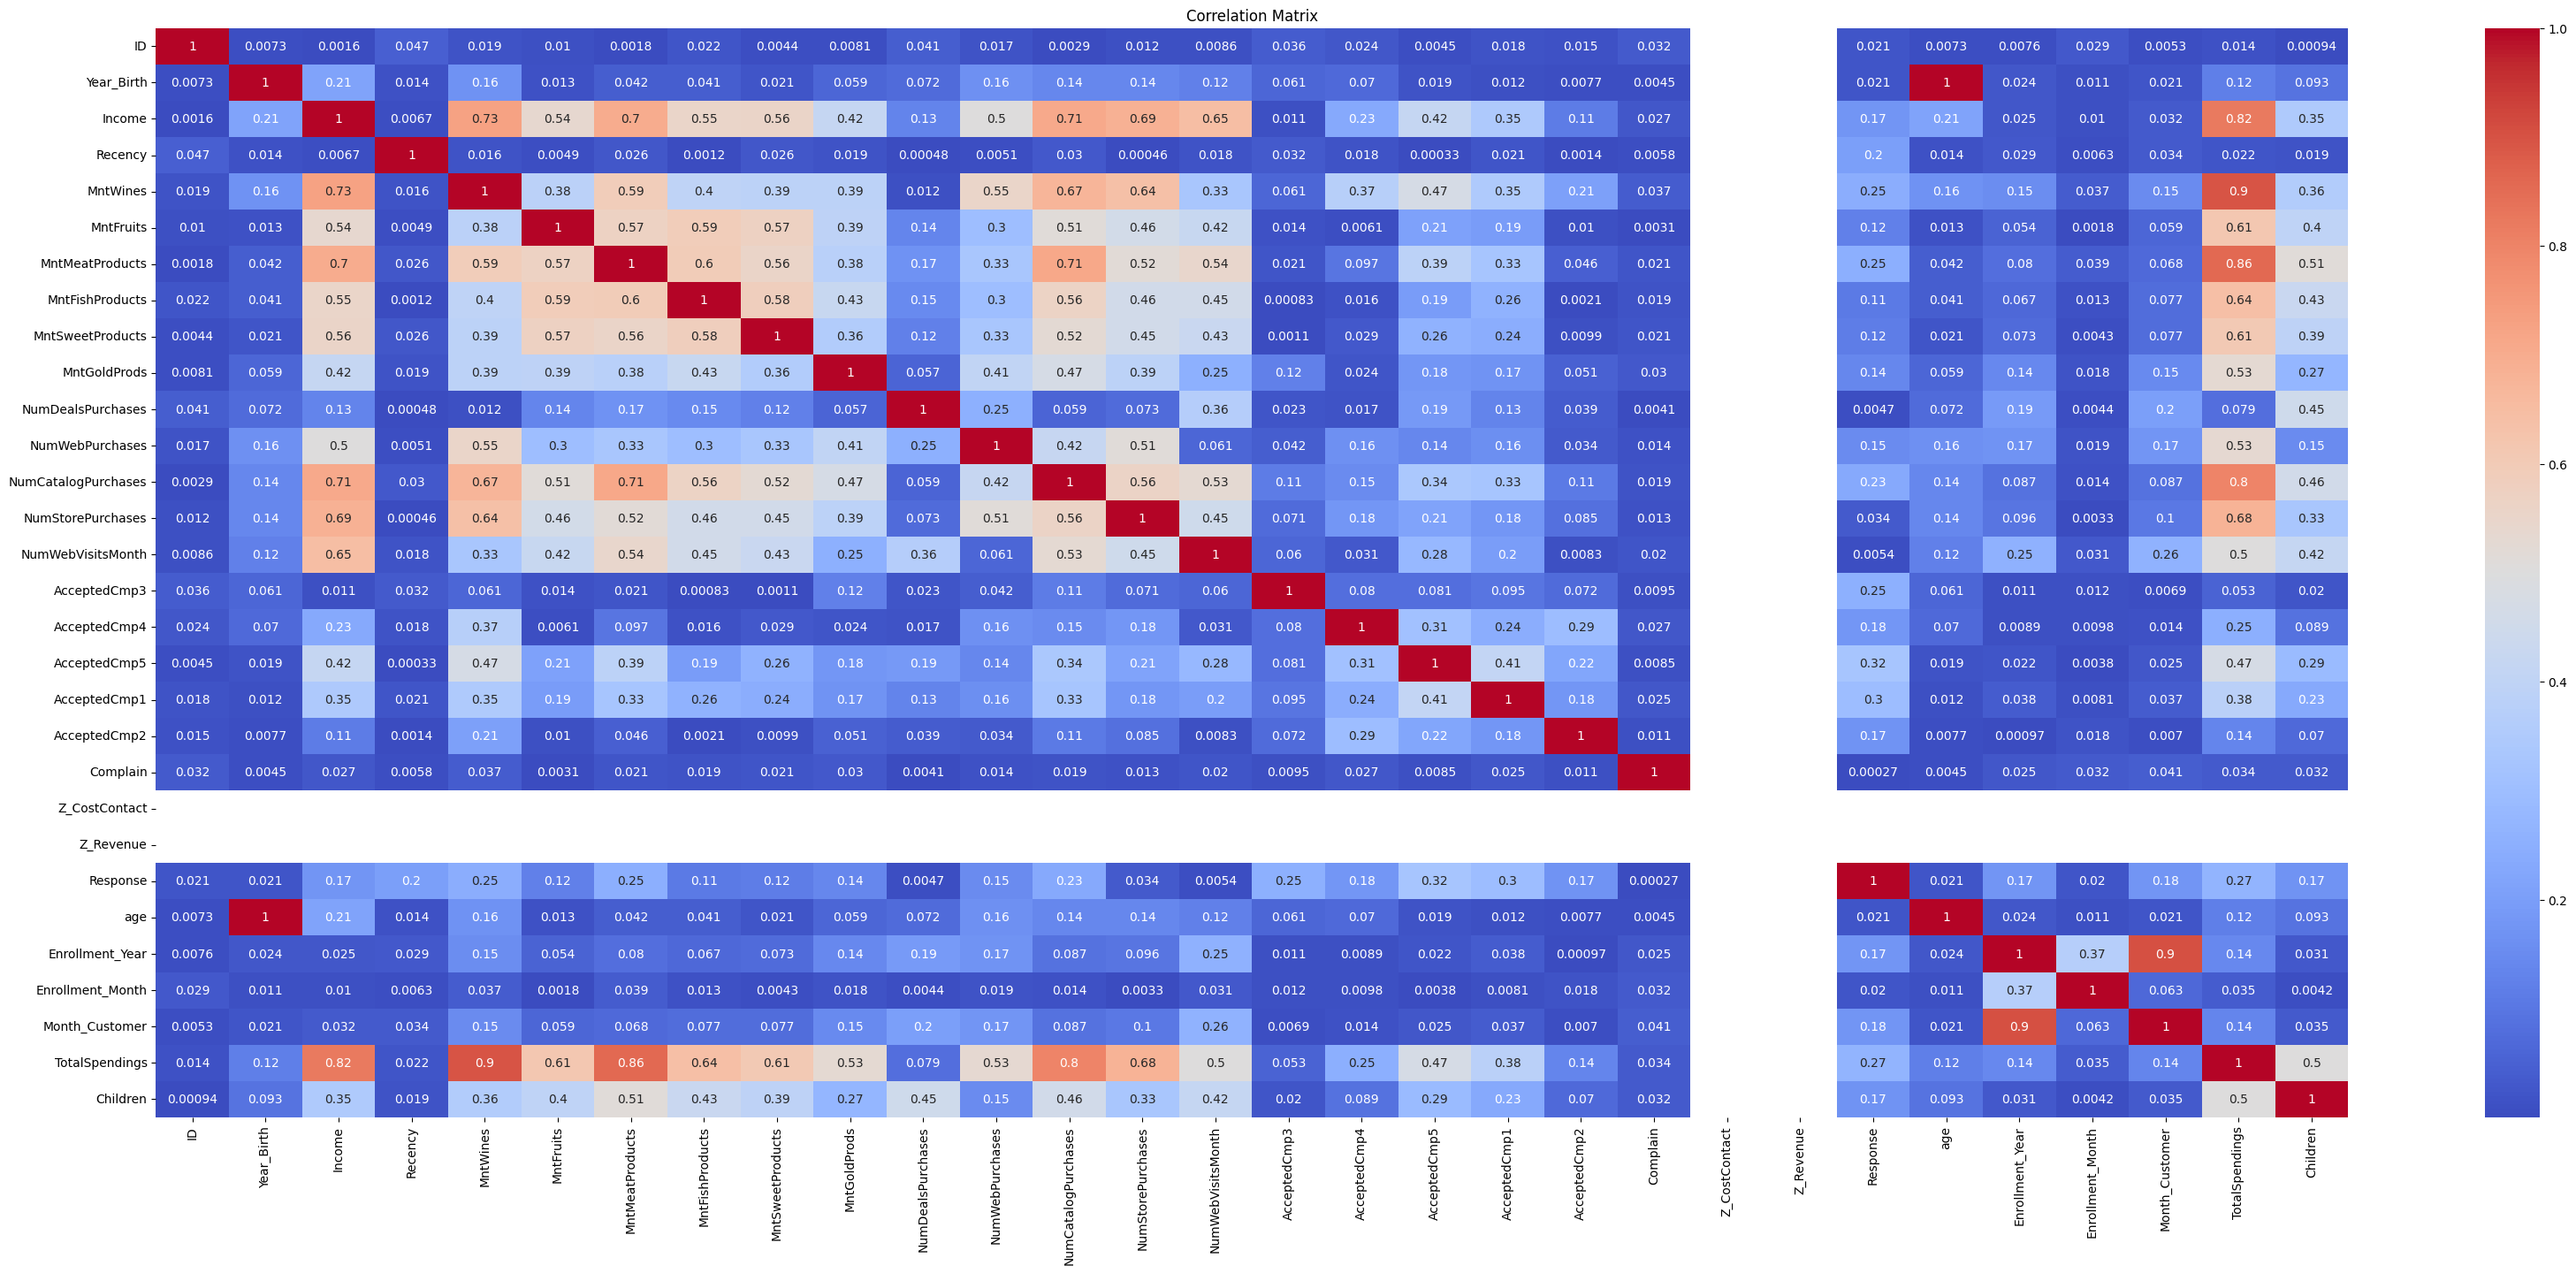

In [ ]:
# Multivariate Analysis (e.g., Correlation Matrix)
correlation_matrix = customer.corr().abs()
plt.figure(figsize=(40, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from prettytable import PrettyTable

# Calculate the correlation matrix
correlation_matrix = customer.corr().abs()

# Set the correlation threshold
correlation_threshold = 0.45

# Find pairs of features with correlation greater than or equal to the threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation_coefficient = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((feature1, feature2, correlation_coefficient))
print('INSIGHTS : These all features are co-related to each other and may give redundant information.')
# Create a PrettyTable for better formatting
table = PrettyTable()
table.field_names = ["Feature 1", "Feature 2", "Correlation Coefficient"]

# Add rows to the table
for pair in highly_correlated_pairs:
    table.add_row([pair[0], pair[1], pair[2]])

# Print the table
print(table)


INSIGHTS : These all features are co-related to each other and may give redundant information.
+---------------------+---------------------+-------------------------+
|      Feature 1      |      Feature 2      | Correlation Coefficient |
+---------------------+---------------------+-------------------------+
|       MntWines      |        Income       |    0.7304951613642852   |
|      MntFruits      |        Income       |    0.5379202581686491   |
|   MntMeatProducts   |        Income       |    0.7024996196456762   |
|   MntMeatProducts   |       MntWines      |    0.5931189305530964   |
|   MntMeatProducts   |      MntFruits      |    0.5681000980626549   |
|   MntFishProducts   |        Income       |    0.5517580018179079   |
|   MntFishProducts   |      MntFruits      |    0.5925564347818175   |
|   MntFishProducts   |   MntMeatProducts   |    0.5956730220267628   |
|   MntSweetProducts  |        Income       |    0.5556010365636538   |
|   MntSweetProducts  |      MntFruits   

<ipython-input-162-63210ec74981>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer.corr().abs()


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       1735 non-null   object        
 4   Income               2205 non-null   float64       
 5   Dt_Customer          2205 non-null   datetime64[ns]
 6   Recency              2205 non-null   int64         
 7   MntWines             2205 non-null   int64         
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   int64         
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   int64         
 13  NumDealsPurchases    2205 non-nul

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


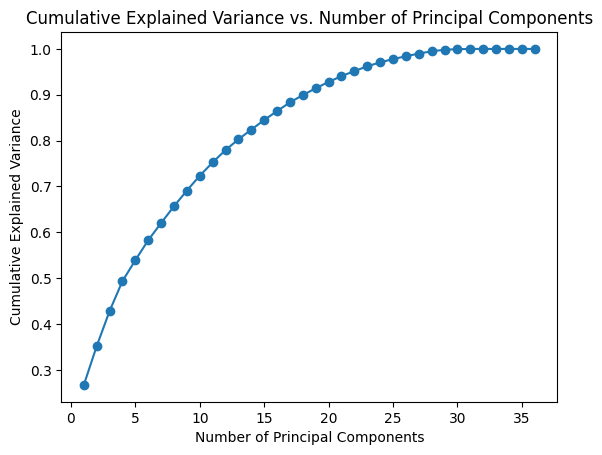

INSIGHTS : 
Number of components to retain for 95.0% explained variance: 22


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Separate numerical and categorical features
numerical_features = customer.select_dtypes(include=['int64', 'float64']).columns
categorical_features = customer.select_dtypes(include=['object']).columns

# Standardize numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(customer[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical_encoded = encoder.fit_transform(customer[categorical_features])

# Combine numerical and encoded categorical features
X_combined = pd.concat([pd.DataFrame(X_numerical_scaled, columns=numerical_features),
                       pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))],
                      axis=1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_combined)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Determine the number of components to retain based on the explained variance
desired_explained_variance = 0.95  # Set your desired level of explained variance
num_components_to_retain = sum(cumulative_explained_variance < desired_explained_variance) + 1
print(f"INSIGHTS : \nNumber of components to retain for {desired_explained_variance * 100}% explained variance: {num_components_to_retain}")

# Retain the desired number of components
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_combined)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(num_components_to_retain)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)

# Concatenate the principal components DataFrame with the target variable
result = pd.concat([X_pca_df, customer['Response']], axis=1)


# **DATA CLUSTERING**

In [ ]:
# Drop specified columns and save the result in a new variable "X"

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# columns_to_drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'MntWines', 'MntFruits',
#                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer',
#                    'Z_CostContact', 'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
#                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
#                    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'AgeGroup']
columns_to_drop = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer',
                   'Z_CostContact', 'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                   'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'AgeGroup']
X = customer.drop(columns=columns_to_drop)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

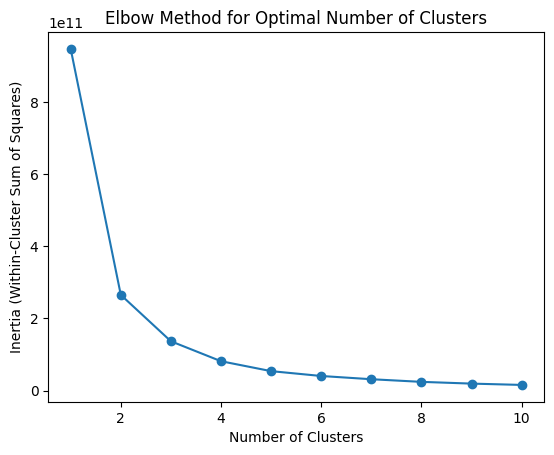

In [ ]:
# Use Kmeans algorithm on "X" dataset and find the best number of clusters using the Elbow Method
inertia_values = []
max_clusters = 10

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

INSIGHTS :
At Number of clusters = 4, decrease in the sum of squares (WCSS) starts to slow down, creating an "elbow" shape. This point is considered the optimal k value

In [ ]:
# Predict the labels for the best number of clusters, i.e at 4
best_num_clusters = 4
kmeans_best = KMeans(n_clusters=best_num_clusters, random_state=42)
labels = kmeans_best.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Create a new dataset "customer_kmeans" with predicted labels
customer_kmeans = X.copy()
customer_kmeans['Cluster_Labels'] = kmeans_best.labels_
customer_kmeans

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,age,Enrollment_Year,Enrollment_Month,Month_Customer,TotalSpendings,Children,Cluster_Labels
0,58138.0,635,88,546,172,88,88,58,2012,4,33,1617,0,2
1,46344.0,11,1,6,2,1,6,61,2014,8,5,27,2,3
2,71613.0,426,49,127,111,21,42,50,2013,8,17,776,0,1
3,26646.0,11,4,20,10,3,5,31,2014,10,3,53,1,0
4,58293.0,173,43,118,46,27,15,34,2014,1,12,422,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,709,43,182,42,118,247,48,2013,6,19,1341,1,2
2236,64014.0,406,0,30,0,0,8,69,2014,10,3,444,3,2
2237,56981.0,908,48,217,32,12,24,34,2014,1,12,1241,0,2
2238,69245.0,428,30,214,80,30,61,59,2014,1,12,843,1,2


INSIGHTS :
We get the column *Cluster_labels* which categorizes the different types of customers.


Cluster Insights:


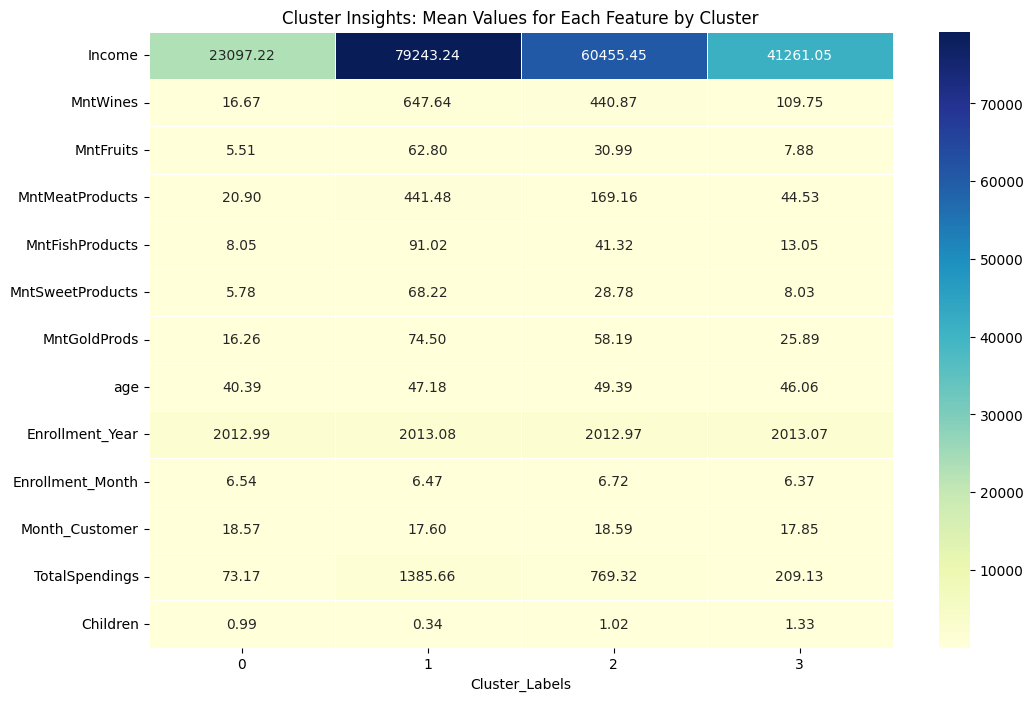

In [ ]:
# Now let's gain some insights on the column --> Cluster_labels

# Group by 'Cluster_Labels' and calculate mean for each numerical feature
cluster_insights = customer_kmeans.groupby('Cluster_Labels').mean()

# insights for each cluster
print("Cluster Insights:")

# insights using a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_insights.T, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Cluster Insights: Mean Values for Each Feature by Cluster')
plt.show()


# INSIGHTS on types of Customer :

* We have 4 types of customers based on our pattern prediction. **(Basically 0,1,2,3)**
* Customer type *0* --> Customers with Average values of (Income = 23097, age = 40, Enrollment year = 2012, Enrollment month = 6, Month Customer = 18, Total spendings = 73 and Children = 1)
  * Lowest consumption of WINES
  * Lowest Consumption of FRUITS
  * Lowest Consumption of MEAT PRODUCTS
  * Lowest Consumption of FISH PRODUCTS
  * Lowest Consumption of SWEET PRODUCTS
  * Lowest Consumption of GOLD PRODUCTS

* Customer type *1* --> Customers with Average values of (Income = 79243, age = 47, Enrollment year = 2013, Enrollment month = 6, Month Customer = 17, Total spendings = 1385 and Children = 0)
  * Highest consumption of WINES
  * Highest Consumption of FRUITS
  * Highest Consumption of MEAT PRODUCTS
  * Highest Consumption of FISH PRODUCTS
  * Highest Consumption of SWEET PRODUCTS
  * Highest Consumption of GOLD PRODUCTS

* Customer type *2* --> Customers with Average values of (Income = 60455, age = 49, Enrollment year = 2012, Enrollment month = 6, Month Customer = 18, Total spendings = 769 and Children = 1)
  * 2nd Highest consumption of WINES
  * 2nd Highest Consumption of FRUITS
  * 2nd Highest Consumption of MEAT PRODUCTS
  * 2nd Highest Consumption of FISH PRODUCTS
  * 2nd Highest Consumption of SWEET PRODUCTS
  * 2nd Highest Consumption of GOLD PRODUCTS

* Customer type *2* --> Customers with Average values of (Income = 41261, age = 46, Enrollment year = 2013, Enrollment month = 6, Month Customer = 17, Total spendings = 209 and Children = 1 and more)
  * 3rd Highest consumption of WINES
  * 3rd Highest Consumption of FRUITS
  * 3rd Highest Consumption of MEAT PRODUCTS
  * 3rd Highest Consumption of FISH PRODUCTS
  * 3rd Highest Consumption of SWEET PRODUCTS
  * 3rd Highest Consumption of GOLD PRODUCTS





# THANK YOU

Thank you for giving me this opportunity to gain hands-on experience on Unsupervised Machine learning model prediction. I have learned and applied various new techniques in this project like PCA, Scaling methods and Data Clustering methods.

Thank you @Board_Infinity

